# Local updates MCMC

In [1]:
from __future__ import annotations

import math
import torch
import numpy as np
import matplotlib.pyplot as plt

import actions
import mcmc
import transforms
import utils

PI = math.pi

%load_ext lab_black

INFO:blib2to3.pgen2.driver:Generating grammar tables from /home/joe/.miniconda3/envs/xy/lib/python3.9/site-packages/blib2to3/Grammar.txt
INFO:blib2to3.pgen2.driver:Writing grammar tables to /home/joe/.cache/black/21.12b0/Grammar3.9.7.final.0.pickle
INFO:blib2to3.pgen2.driver:Writing failed: [Errno 2] No such file or directory: '/home/joe/.cache/black/21.12b0/tmpntyxyxlz'
INFO:blib2to3.pgen2.driver:Generating grammar tables from /home/joe/.miniconda3/envs/xy/lib/python3.9/site-packages/blib2to3/PatternGrammar.txt
INFO:blib2to3.pgen2.driver:Writing grammar tables to /home/joe/.cache/black/21.12b0/PatternGrammar3.9.7.final.0.pickle
INFO:blib2to3.pgen2.driver:Writing failed: [Errno 2] No such file or directory: '/home/joe/.cache/black/21.12b0/tmpck83c6lu'


In [2]:
LATTICE_SHAPE = [10, 10]
COUPLING_STRENGTH = 1.0
INIT_CONFIG = torch.empty(LATTICE_SHAPE).uniform_(-PI, PI)

In [3]:
metropolis_sampler = mcmc.MetropolisSampler(INIT_CONFIG, COUPLING_STRENGTH)
metropolis_sampler.sample(n_sweeps=1000)

0.31918

In [4]:
heatbath_sampler = mcmc.HeatbathSampler(INIT_CONFIG, COUPLING_STRENGTH)
heatbath_sampler.sample(n_sweeps=1000)

In [5]:
gibbs_sampler = mcmc.CheckerboardGibbsSampler(INIT_CONFIG, COUPLING_STRENGTH)
gibbs_sampler.sample(n_sweeps=1000)

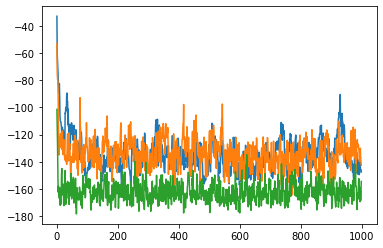

In [6]:
plt.plot(metropolis_sampler.history["energy"])
plt.plot(heatbath_sampler.history["energy"])
plt.plot(gibbs_sampler.history["energy"])

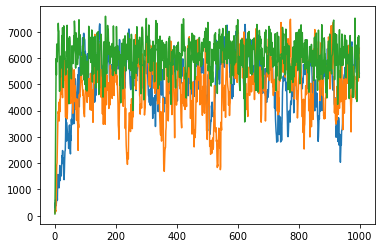

In [7]:
plt.plot(metropolis_sampler.history["magnetisation_sq"])
plt.plot(heatbath_sampler.history["magnetisation_sq"])
plt.plot(gibbs_sampler.history["magnetisation_sq"])